In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\Pandasdata\DT_files\winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# This is a classification problem. Quality is the target variable (Higher the number better the quality)

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df_corr= df.corr()

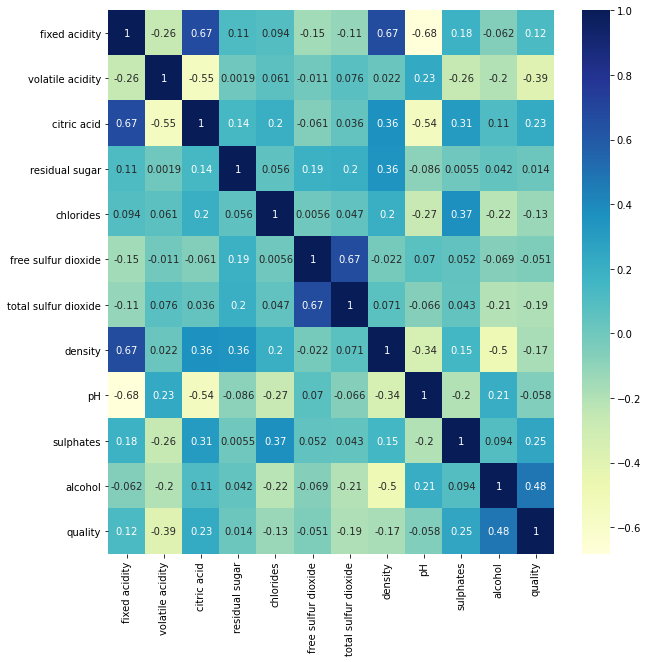

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, cmap='YlGnBu', annot = True)

#### The below features are having good correlation with target variable(quality)
1. alcohol (0.48)
2. Sulphates(0.25)
3. citric acid (0.23)
4. fixed acidity (0.12)

Volatile acidity is having a very low correlation

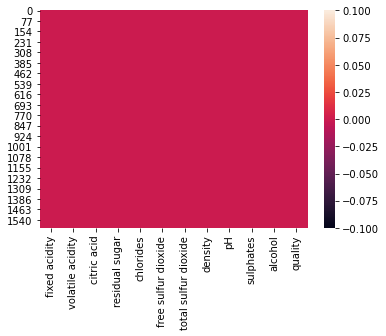

In [9]:
sns.heatmap(df.isnull())

In [10]:
# No missing Values

### univariate analysis

In [11]:
ncols=12
nrows=10
coll_list = df.columns.values

In [12]:
coll_list

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

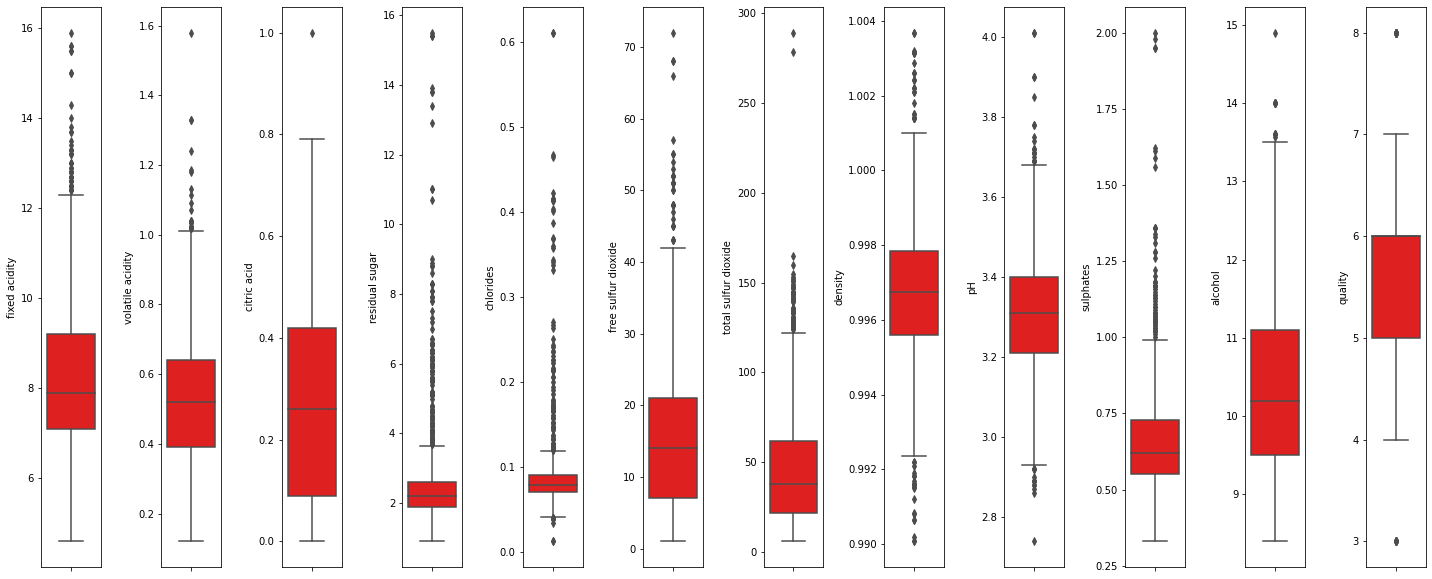

In [13]:
plt.figure(figsize=(20,80))
for i in range(0,len(coll_list)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[coll_list[i]], color ='red', orient='v')
    plt.tight_layout()
    

In [14]:
#### This shows us that there are outliers in all the features

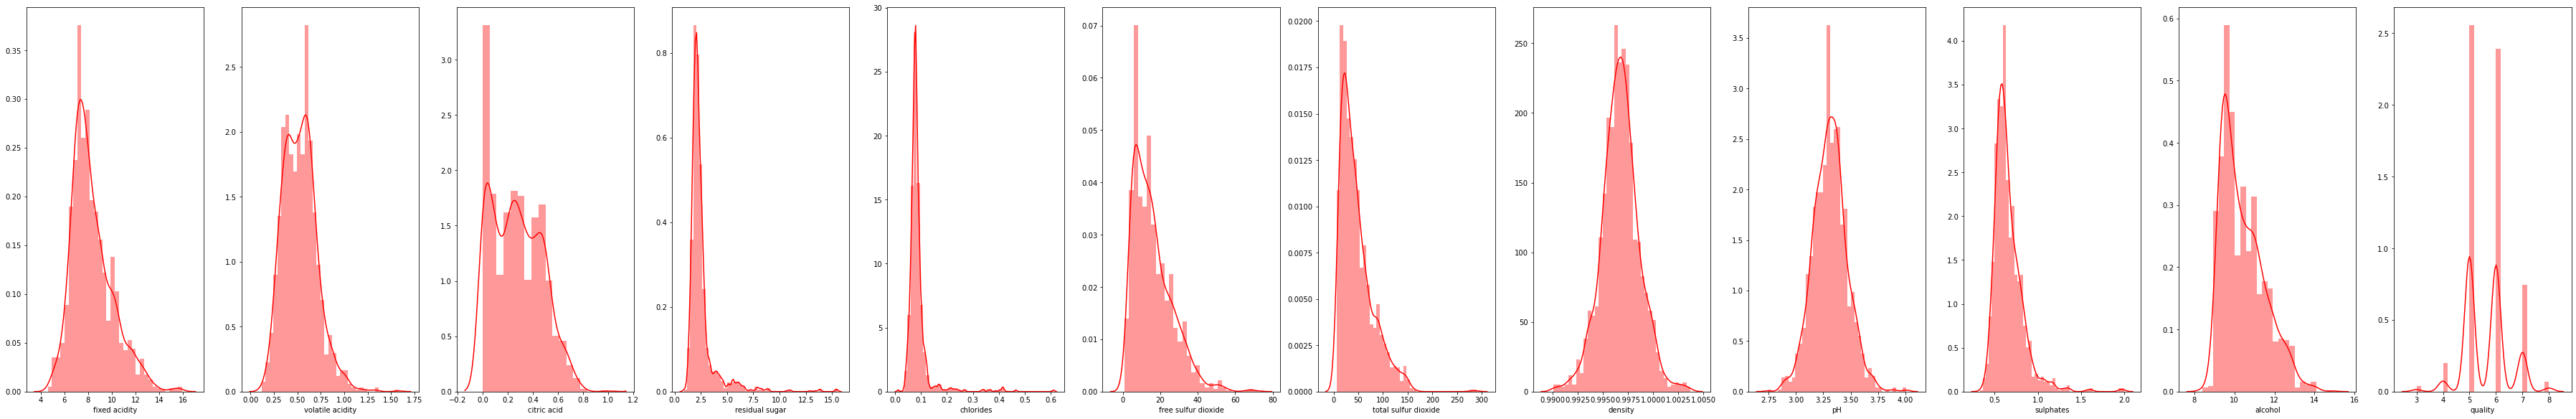

In [15]:
plt.figure(figsize=(50,80))
for i in range(0,len(coll_list)):
    plt.subplot(nrows,ncols,i+1)
    sns.distplot(df[coll_list[i]],color ='red')
    plt.tight_layout()

In [16]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [17]:
# Except citric acid,density, PH and quality all other features are having skewness

In [18]:
# Treating the skewness in data
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [19]:
# Checking the skewness
df.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
quality                 0.217802
dtype: float64

In [20]:
# it did not treat values >1
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [21]:
df.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          1.663518
chlorides               4.608349
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.238876
alcohol                 0.628272
quality                 0.217802
dtype: float64

In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.128232,0.530628,0.00,0.724990,0.070692,2.484907,3.555348,0.9978,3.51,0.367892,1.206511,5
1,2.174752,0.631272,0.00,0.824585,0.089375,3.258097,4.219508,0.9968,3.20,0.417916,1.217741,5
2,2.174752,0.565314,0.04,0.785691,0.084351,2.772589,4.007333,0.9970,3.26,0.405982,1.217741,5
3,2.501436,0.246860,0.56,0.724990,0.069825,2.890372,4.110874,0.9980,3.16,0.376671,1.217741,6
4,2.128232,0.530628,0.00,0.724990,0.070692,2.484907,3.555348,0.9978,3.51,0.367892,1.206511,5


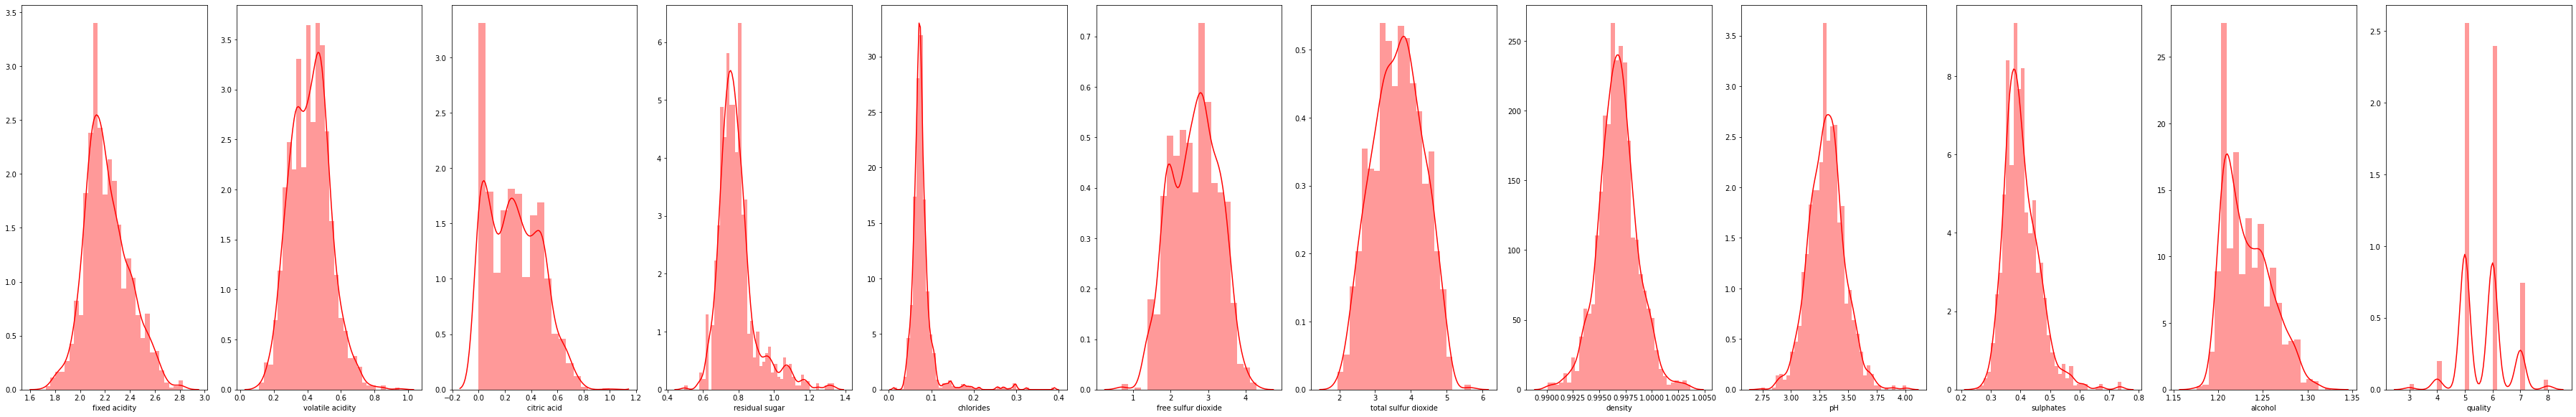

In [23]:
# let us check the distribution again
plt.figure(figsize=(50,80))
for i in range(0,len(coll_list)):
    plt.subplot(nrows,ncols,i+1)
    sns.distplot(df[coll_list[i]],color ='red')
    plt.tight_layout()

In [24]:
### we can clerly see that the data is almost normally distributed. We will do the skewness check again after removing the outliers

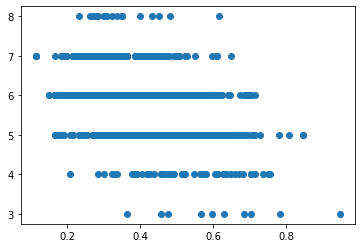

In [25]:
plt.scatter(df['volatile acidity'],df['quality'])

In [26]:
# volatile acidity and quality are having negative correlation. So we will drop the feature

In [27]:
df.drop('volatile acidity', axis =1, inplace= True)

In [28]:
df.head()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.128232,0.00,0.724990,0.070692,2.484907,3.555348,0.9978,3.51,0.367892,1.206511,5
1,2.174752,0.00,0.824585,0.089375,3.258097,4.219508,0.9968,3.20,0.417916,1.217741,5
2,2.174752,0.04,0.785691,0.084351,2.772589,4.007333,0.9970,3.26,0.405982,1.217741,5
3,2.501436,0.56,0.724990,0.069825,2.890372,4.110874,0.9980,3.16,0.376671,1.217741,6
4,2.128232,0.00,0.724990,0.070692,2.484907,3.555348,0.9978,3.51,0.367892,1.206511,5


In [29]:
df.shape

(1599, 11)

In [30]:
### Removing outliers

In [31]:
from scipy.stats import zscore

In [32]:
z=np.abs(zscore(df))

In [33]:
z

array([[0.49206951, 1.39147228, 0.59289307, ..., 0.60779039, 1.00002083,
        0.78782264],
       [0.23078609, 1.39147228, 0.31237469, ..., 0.22648802, 0.57024589,
        0.78782264],
       [0.23078609, 1.18607043, 0.04115188, ..., 0.02744983, 0.57024589,
        0.78782264],
       ...,
       [1.28039794, 0.72391627, 0.04115188, ..., 0.66882245, 0.60463425,
        0.45084835],
       [1.59690876, 0.77526673, 0.44485976, ..., 0.41971741, 0.16061948,
        0.78782264],
       [1.51609325, 1.02199944, 1.24018053, ..., 0.09446025, 0.60463425,
        0.45084835]])

In [34]:
threshold = 3
print(np.where(z>3))

(array([  13,   17,   17,   19,   33,   42,   45,   81,   81,   83,   86,
         88,   91,   92,   95,  106,  106,  147,  151,  151,  151,  151,
        163,  164,  169,  169,  181,  226,  226,  240,  243,  244,  258,
        258,  274,  281,  291,  324,  325,  339,  396,  400,  442,  442,
        451,  459,  480,  480,  494,  517,  530,  535,  554,  554,  555,
        555,  557,  557,  566,  567,  568,  595,  608,  614,  639,  649,
        652,  652,  652,  666,  690,  692,  695,  723,  730,  754,  773,
        776,  777,  832,  836,  837,  889,  899,  911,  917,  923, 1017,
       1018, 1043, 1051, 1051, 1071, 1074, 1079, 1081, 1111, 1114, 1165,
       1186, 1235, 1244, 1260, 1269, 1270, 1299, 1300, 1316, 1319, 1319,
       1321, 1370, 1372, 1374, 1374, 1434, 1434, 1435, 1435, 1469, 1474,
       1474, 1476, 1476, 1478, 1505, 1558, 1570, 1574, 1589], dtype=int64), array([ 8,  3,  8,  3,  2,  3,  7,  3,  8,  3,  8,  8,  8,  8,  7,  3,  8,
        3,  1,  3,  7,  8,  2,  2,  3,  8,  3

In [35]:
df_new = df[(z<3).all(axis =1)]

In [36]:
df_new.shape

(1492, 11)

In [37]:
# 84 rows were removed as they were outliers

In [38]:
# Now we will plot boxplot again to check the outliers

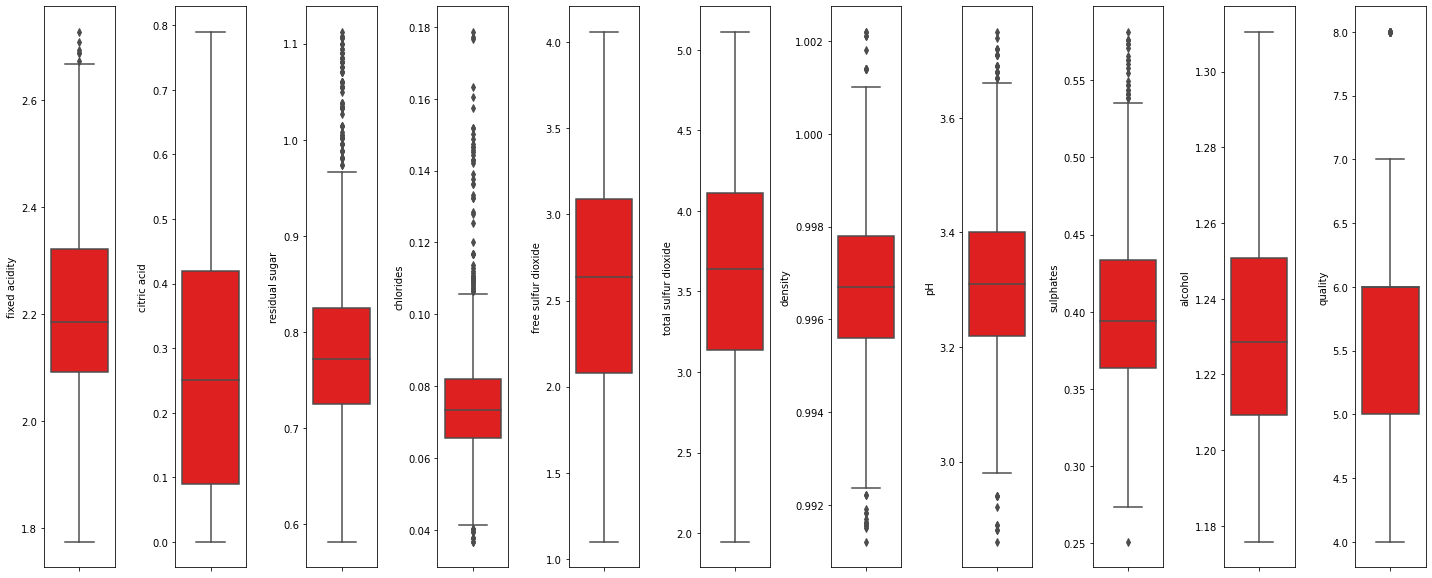

In [39]:
# doubt
coll_list_new = df.columns.values
nrows_new =10
ncols_new=11

plt.figure(figsize=(20,80))
for i in range(0,len(coll_list_new)):
    plt.subplot(nrows_new,ncols_new,i+1)
    sns.boxplot(df_new[coll_list_new[i]], color ='red', orient='v')
    plt.tight_layout()

In [40]:
for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [41]:
df_new.skew()

fixed acidity           0.435517
citric acid             0.299264
residual sugar          0.970973
chlorides               1.526292
free sulfur dioxide    -0.083948
total sulfur dioxide   -0.037578
density                 0.030157
pH                      0.123624
sulphates               0.487143
alcohol                 0.574228
quality                 0.421143
dtype: float64

In [42]:
for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.sqrt(df_new[col])

In [43]:
df_new.skew()

fixed acidity           0.435517
citric acid             0.299264
residual sugar          0.814199
chlorides               0.859287
free sulfur dioxide    -0.083948
total sulfur dioxide   -0.037578
density                 0.030157
pH                      0.123624
sulphates               0.487143
alcohol                 0.561686
quality                 0.421143
dtype: float64

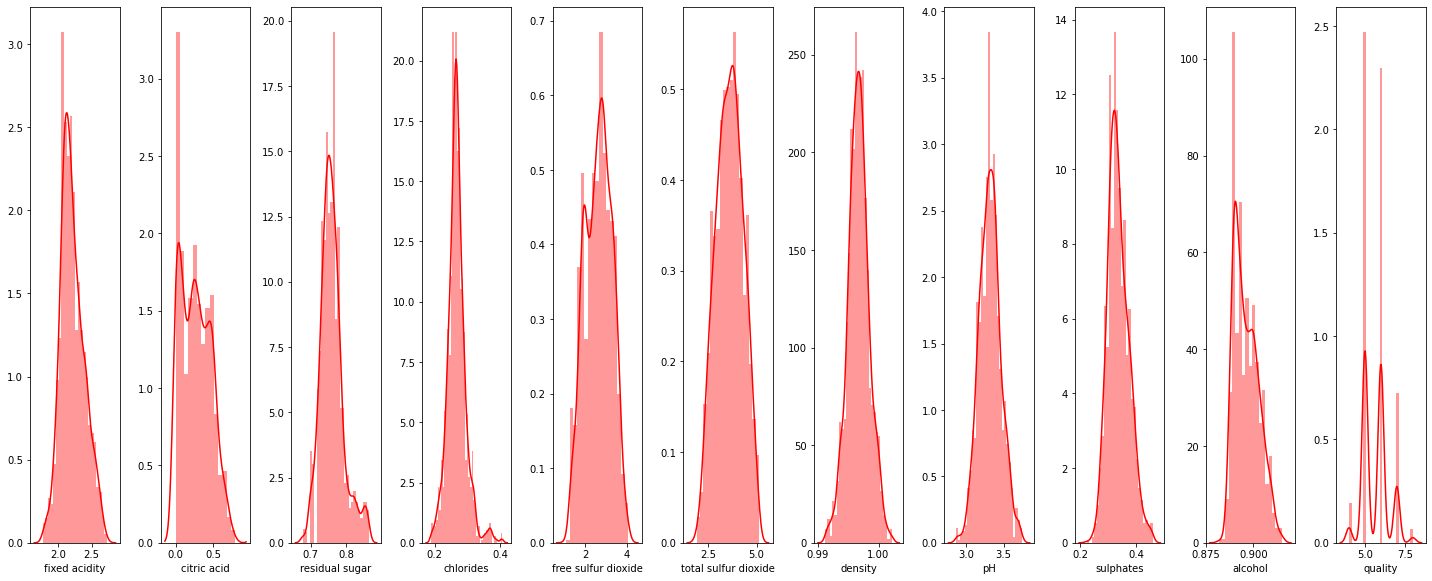

In [44]:
# let us check the distribution again
coll_list_new = df_new.columns.values
nrows_new =10
ncols_new=11

plt.figure(figsize=(20,80))
for i in range(0,len(coll_list_new)):
    plt.subplot(nrows_new,ncols_new,i+1)
    sns.distplot(df_new[coll_list_new[i]], color ='red')
    plt.tight_layout()

In [45]:
df_new.shape

(1492, 11)

In [46]:
df_new.tail()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,1.974081,0.08,0.744727,0.281825,3.496508,3.806662,0.99490,3.45,0.319668,0.897083,5
1595,1.931521,0.10,0.756217,0.238268,3.688879,3.951244,0.99512,3.52,0.370243,0.901299,6
1596,1.987874,0.13,0.761450,0.261352,3.401197,3.713572,0.99574,3.42,0.367721,0.900132,6
1597,1.931521,0.12,0.744727,0.259798,3.496508,3.806662,0.99547,3.57,0.357327,0.895156,5
1598,1.945910,0.47,0.809807,0.246860,2.944439,3.761200,0.99549,3.39,0.343590,0.900132,6


In [47]:
x =df_new.iloc[:,0:-1]

In [48]:
y =df_new.iloc[:,-1]

In [49]:
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
ss.fit(x)
x =ss.transform(x)

In [50]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1492, dtype: int64

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, f1_score

In [67]:
def maxf1score(algo,x,y):
    f1_sc=0
    randstate =0
    for r_state in range(42, 1598):
        x_train,x_test,y_train,y_test = train_test_split(x,y, random_state =r_state, test_size =0.2)
        algo.fit(x_train, y_train)
        pred = algo.predict(x_test)
        f1score = f1_score(y_test,pred, average='micro')
        
        if f1score> f1_sc:
            f1_sc = f1score
            randstate = r_state
    print("The Max f1 Score is: ", f1_sc,"at random state: ", randstate)
    print("Accuracy score:", accuracy_score(y_test,pred))

In [68]:
knn_algo = KNeighborsClassifier(n_neighbors=3)

In [69]:
maxf1score(knn_algo,x,y)

The Max f1 Score is:  0.6789297658862876 at random state:  1379
Accuracy score: 0.5752508361204013


In [60]:

svc = SVC(kernel='poly', C=1)

In [61]:
maxf1score(svc,x,y)

The Max f1 Score is:  0.6722408026755853 at random state:  580


In [ ]:
#will work to improve the accuracy